# DSCI 503 - Homework 07
### Symphony Hopkins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Problem 1: NYC Restaurants Dataset

In [2]:
nyc = pd.read_csv('nyc.txt', sep = '\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:, 1:6].values
y1 = nyc.iloc[:, 0].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2, random_state=1)

print(f'''
Training Features Shape: {X_train_1.shape}
Test Features Shape: {X_test_1.shape}''')


Training Features Shape: (134, 5)
Test Features Shape: (34, 5)


In [4]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

print('Intercept:', nyc_mod.intercept_)
print('Slope:    ', nyc_mod.coef_)

Intercept: -23.755435322488907
Slope:     [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [6]:
test_obs_1 = X_test_1[0:10]
test_pred_1 = nyc_mod.predict(test_obs_1)

print(f'''
Observed Prices:  {y_test_1[0:10]}
Estimated Prices: {np.round(test_pred_1, 2)}''')


Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [7]:
nyc_new = pd.DataFrame({'Food':[22, 18, 25],
                        'Decor':[12, 19, 22],
                        'Service':[20, 22, 18],
                        'Wait':[15, 34, 36],
                        'East':[0, 1, 0]})

new_pred_1 = nyc_mod.predict(nyc_new)

print(f'''Estimated Prices: {np.round(new_pred_1, 2)}''')

Estimated Prices: [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [8]:
diamonds = pd.read_csv('diamonds.txt', sep = '\t')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


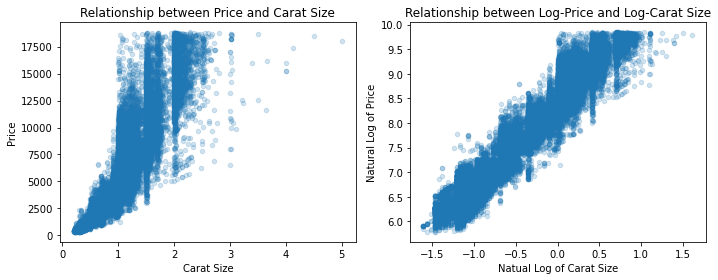

In [10]:
plt.figure(figsize = [10,4])
plt.subplot(1, 2, 1)
plt.scatter(diamonds['carat'], diamonds['price'],
            s=20, alpha=0.2)

plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.title("Relationship between Price and Carat Size")   


plt.subplot(1, 2, 2)
plt.scatter(diamonds['ln_carat'], diamonds['ln_price'],
            s=20, alpha=0.2)

plt.xlabel('Natual Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title("Relationship between Log-Price and Log-Carat Size")   

plt.tight_layout()
plt.show()   

In [11]:
X2 = diamonds.iloc[:, -2].values.reshape(len(diamonds.iloc[:, -2]),1)
y2 = diamonds.iloc[:, -1].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1, random_state=1)

print(f'''
Training Features Shape: {X_train_2.shape}
Test Features Shape:     {X_test_2.shape}''')


Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)


In [12]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

print('Intercept:', dia_mod.intercept_)
print('Slope:    ', dia_mod.coef_)



Intercept: 8.448298621179154
Slope:     [1.67493107]


In [13]:
train_r2 = dia_mod.score(X_train_2, y_train_2)
test_r2 = dia_mod.score(X_test_2, y_test_2)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.933
Testing r-Squared:  0.9328


In [14]:
test_pred_2 = dia_mod.predict(X_test_2[0:10])

obs_prices = 10 ** (y_test_2[0:10])
est_prices = 10 ** test_pred_2

print(f'''
Observed Prices:  {np.round(obs_prices, 1)}
Estimated Prices: {np.round(est_prices, 1)}''')


Observed Prices:  [2.16298870e+06 4.84259000e+08 7.05575484e+07 1.93195980e+06
 4.93738139e+08 7.79158650e+06 3.67630694e+08 2.60074010e+06
 1.49346457e+09 1.14260978e+07]
Estimated Prices: [3.90269980e+06 5.67119606e+08 4.44244036e+07 4.37891790e+06
 5.67119606e+08 2.42617027e+07 3.77748771e+08 9.01432540e+06
 1.34098750e+09 4.89687400e+06]


In [15]:
diamonds_new = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
n = len(diamonds_new)
diamonds_new = diamonds_new.reshape(n,1)

new_pred_2 = dia_mod.predict(diamonds_new)
new_prices = 10 ** new_pred_2
print(f'''Estimated Prices: {np.round(new_prices, 1)}''')

Estimated Prices: [1.93091944e+09 1.32809668e+10 9.13471970e+10 6.28290886e+11
 4.32141818e+12 2.97229444e+13]


## Problem 3: Heart Disease Dataset

In [16]:
hd = pd.read_csv('heart_disease.txt', sep = '\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
X3 = hd.iloc[:,:-1].values
y3 = hd.iloc[:, -1].values

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size = 0.2, random_state=1,  stratify=y3)

print(f'''
Training Features Shape: {X_train_3.shape}
Test Features Shape: {X_test_3.shape}''')


Training Features Shape: (216, 13)
Test Features Shape: (54, 13)


In [18]:
hd_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
hd_mod.fit(X_train_3, y_train_3)


print(f'''
Intercept: {hd_mod.intercept_}
Coefficients: 
{hd_mod.coef_}''')


Intercept: [-9.80102981]
Coefficients: 
[[-0.03380697  1.81357948  0.75011399  0.02514333  0.01440893 -0.70650711
   0.32436838 -0.01972059  0.74126429  0.36738603  0.27433121  1.07882293
   0.38296869]]


In [19]:
train_r2 = hd_mod.score(X_train_3, y_train_3)
test_r2 = hd_mod.score(X_test_3, y_test_3)

print('Training Accuracy:', round(train_r2,4))
print('Testing Accuracy: ', round(test_r2,4))

Training Accuracy: 0.8519
Testing Accuracy:  0.8148


In [20]:
test_pred_3 = hd_mod.predict(X_test_3[0:20])

print(f'''
Observed Labels:  {np.round(y_test_3[0:20], 1)}
Estimated Lables: {np.round(test_pred_3, 1)}
''')


Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Estimated Lables: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]



In [21]:
hd_proba_data = hd_mod.predict_proba(X_test_3[0:10])
hd_proba_df = pd.DataFrame(hd_proba_data, columns =['1', '2'])
hd_proba_df

,1,2
0,0.011588,0.988412
1,0.042855,0.957145
2,0.039705,0.960295
3,0.847798,0.152202
4,0.874299,0.125701
5,0.051805,0.948195
6,0.919850,0.080150
7,0.944686,0.055314
8,0.009846,0.990154
9,0.996746,0.003254


## Problem 4: Gapminder Dataset 

In [22]:
gm = pd.read_csv('gapminder_data.txt', sep = '\t')

gm18 = gm.loc[gm.year == 2018,:].reset_index(drop=True)
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
0,Afghanistan,2018,asia,36400000,58.7,1870,36.8
1,Albania,2018,europe,2930000,78.0,12400,29.0
2,Algeria,2018,africa,42000000,77.9,13700,27.6
3,Angola,2018,africa,30800000,65.2,5850,42.6
4,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
5,Argentina,2018,americas,44700000,77.0,18900,42.4
6,Armenia,2018,europe,2930000,76.0,8660,32.6
7,Australia,2018,asia,24800000,82.9,45800,32.3
8,Austria,2018,europe,8750000,81.8,44600,30.5
9,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [23]:
X4 = gm18.iloc[:,-3:].values
y4 = gm18.iloc[:,2].values

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size = 0.3, random_state=1,  stratify=y4)

print(f'''
Training Features Shape: {X_train_4.shape}
Test Features Shape: {X_test_4.shape}''')


Training Features Shape: (128, 3)
Test Features Shape: (56, 3)


In [24]:
gm_mod = LogisticRegression(solver='lbfgs', penalty='none', multi_class = 'multinomial', max_iter=1000)
gm_mod.fit(X_train_4, y_train_4)


print(f'''
Intercept: {gm_mod.intercept_}
Coefficients: 
{gm_mod.coef_}''')


Intercept: [ 0.00206206 -0.00474954  0.00333784 -0.00065036]
Coefficients: 
[[-8.83756448e-02 -1.02856964e-04  2.01053456e-01]
 [-8.63154959e-02  3.30583699e-05  1.59921897e-01]
 [ 1.95506117e-02  2.94566725e-05 -2.37138157e-02]
 [ 1.55140529e-01  4.03419217e-05 -3.37261537e-01]]


In [25]:
train_r2 = gm_mod.score(X_train_4, y_train_4)
test_r2 = gm_mod.score(X_test_4, y_test_4)

print('Training Accuracy:', round(train_r2,4))
print('Testing Accuracy: ', round(test_r2,4))

Training Accuracy: 0.625
Testing Accuracy:  0.5893


In [26]:
test_pred_4 = gm_mod.predict(X_test_4[0:8])

print(f'''
Observed Labels:  {y_test_4[0:8]}
Estimated Lables: {test_pred_4}
''')


Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Estimated Lables: ['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']



In [27]:
gm_proba_data = gm_mod.predict_proba(X_test_4[0:10])
gm_proba_df = pd.DataFrame(gm_proba_data, columns =['africa', 'americas','asia','europe'])
gm_proba_df

,africa,americas,asia,europe
0,0.066410,0.259268,0.578301,0.096021
1,0.001109,0.043495,0.358611,0.596785
2,0.662979,0.210900,0.122644,0.003477
3,0.227069,0.261923,0.456446,0.054563
4,0.002031,0.004899,0.112893,0.880176
5,0.001848,0.023786,0.252908,0.721458
6,0.630473,0.219053,0.146543,0.003931
7,0.000027,0.000734,0.033395,0.965845
8,0.001240,0.010805,0.163984,0.823971
9,0.178113,0.117709,0.492621,0.211558


In [28]:
gm_new = pd.DataFrame({'life_exp':[75, 75, 75, 75, 75, 75],
                        'gpd_per_cap':[5000, 5000, 5000, 20000, 20000, 20000],
                        'gini':[30, 40, 50, 30, 40, 50]})

gm_new_proba = gm_mod.predict_proba(gm_new)

gm_new_proba_df = pd.DataFrame(np.round(gm_new_proba, 3), columns =['africa', 'americas','asia','europe'])
gm_new_proba_df

,africa,americas,asia,europe
0,0.038,0.026,0.288,0.649
1,0.433,0.191,0.343,0.034
2,0.726,0.212,0.061,0.000
3,0.005,0.025,0.265,0.705
4,0.092,0.313,0.533,0.061
5,0.259,0.582,0.158,0.001


According to our model:
* Country 0 is most likely in Europe.
* Country 1 is most likely in Africa.
* Country 2 is most likely in Africa.
* Country 3 is most likely in Europe.
* Country 4 is most likely in Asia.
* Country 5 is most likely in Americas.